In [1]:

def normal_test(variable, confidence):
    from scipy.stats import normaltest, kstest
    normal_test_result = normaltest(variable)
    kstest_result = kstest(variable, 'norm')
    
    print("[Normality Test]")
    print('\nStatistic: ', normal_test_result.statistic, '\nP-Value: ', normal_test_result.pvalue)

    if(normal_test_result.pvalue > confidence):
        print('Normal Test pass:  ✅✅✅✅✅✅✅✅✅')
    else:
        print('Normal Test pass:  ❌❌❌❌❌❌❌❌❌')
     
    print("\n[KS Test]")
    print('Statistic: ', kstest_result.statistic, '\nP-Value: ', kstest_result.pvalue)

    if(kstest_result.pvalue > confidence):
        print('KS Test pass:  ✅✅✅✅✅✅✅✅✅')
    else:
        print('KS Test pass:  ❌❌❌❌❌❌❌❌❌')

def descriptive_numeric(variable):

    from scipy.stats import mode,skew,kurtosis
    modeResult = mode(variable)
    print(variable.describe())
    print("[Mode]: The value ", modeResult.mode, ' appears ', modeResult.count, 'times.')
    print("[Skewness]: ",skew(variable))
    print("[Kurtosis]: ", kurtosis(variable))
    normal_test(variable, 0.05)
    



C:\Users\wyver\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wyver\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wyver\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

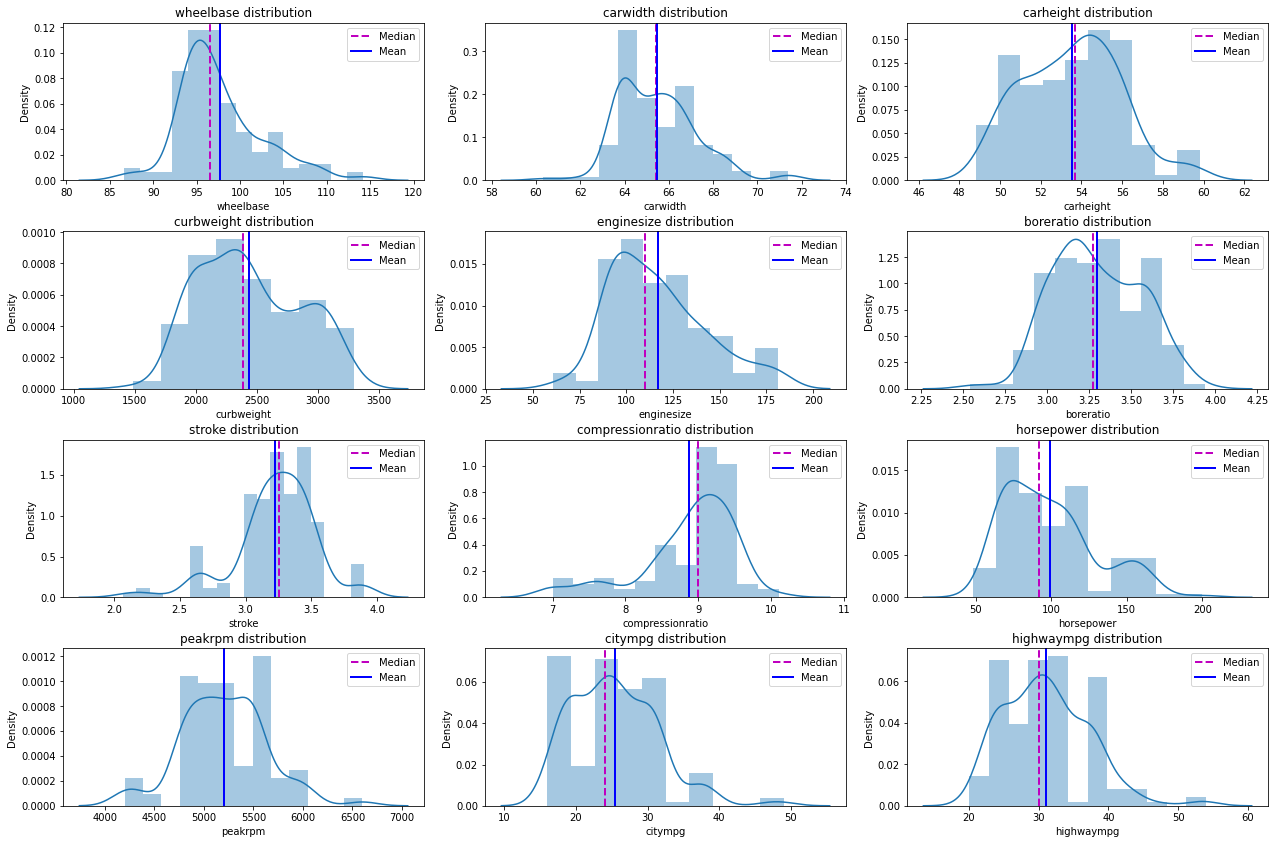

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('./Data/car_data_selection.xlsx')

#Sets the Dtype of symboling column to 'object'. This will ensure its not taken into account when extracting the numeric variables (symboling should be categ, but it defaults to int)
df['symboling'] = df['symboling'].astype('object')
#Extracts only the numerical variables from the original df
numeric_variables = df.select_dtypes(include=[np.number])

#Change this to the numeric variable that needs to be analyzed
current_variable = 'price'

######  Execute this for current_variable

# #Create figure and ax
# fig, ax= plt.subplots(figsize=(10,8))
# sns.distplot(numeric_variables[current_variable], ax=ax)
# ax.set(title="Car "+current_variable)

# #Calculates mean and median for current variable
# median= numeric_variables[current_variable].median()
# mean= numeric_variables[current_variable].mean()

# # Add vertical lines for the median and mean
# ax.axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
# ax.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)
# ax.legend()

#print(descriptive_numeric(numeric_variables[current_variable]))
    
######  Execute this for general solution


#Displays general descriptive statistics for all numeric_variables
# for item in numeric_variables:
#     descriptive_numeric(numeric_variables[item])

#####  Displays the distribution for all numeric variables 
#Removes the 'price' column before
numeric_variables = numeric_variables.loc[:,numeric_variables.columns !='price']

#Set the number of columns the plot should have
nr_cols = 3
#Calculates the number of rows based on the number of variables and nr_cols
nr_rows = int(len(numeric_variables.columns)/nr_cols) + (len(numeric_variables.columns)%nr_cols >0)

fig, ax = plt.subplots(nr_rows, nr_cols, figsize=(18, 12))
fig.tight_layout(pad=3)

for index, item in enumerate(numeric_variables):
    sns.distplot(numeric_variables[item], ax=ax.flat[index])
    ax.flat[index].set(title=item + " distribution")

    median= numeric_variables[item].median()
    mean= numeric_variables[item].mean() 

    ax.flat[index].axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
    ax.flat[index].axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)
    ax.flat[index].legend()


  

    

